## You don't know what to choose between Matlab and Python :

# Try Julia !

<center><img src="figs/julialogo-smaller.png"/></center>


## Why a talk on programming language ?

- [Better Software, Better Research](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6886129&tag=1) (Goble, C. (2014). IEEE Internet Computing)

>  Of  2,000  scientists surveyed  online, **91%** said  **using**  scientific  software  is  important  for  their own research, **84%** said **developing** scientific  software  is  important  for  their  own  research [...] and **38% spend at least one  fifth  of  their  time  developing  software**.  

>   “You  can download our code from the URL supplied. Good luck downloading the only 
> postdoc who can get it to run, though” (Ian  Holmes)
    
- Big Data -> Big Software
- Loi pour une république numérique (2017) $\rightarrow$ new codes must (more or less) be open source (cf https://scinfolex.com/2017/12/08/les-logiciels-produits-par-les-administrations-sont-passes-en-open-source-par-defaut-et-voici-pourquoi/)

# Play with the slides 

https://tinyurl.com/introjuliagipsa 

or https://mybinder.org/v2/gh/raphbacher/julia-intro/master?filepath=presentation_julia.ipynb

Sources:

https://github.com/raphbacher/julia-intro

# Outline

- State of the art : the two language problem
- What is Julia
- Why Julia is fast
- Julia Ecosystem & interop 
- (Parallelism)

## State of the art : Matlab

Pros :
- Polished product with support
- Simulink
- High level syntax

Cons :
- Closed : not everyone has access to it, impossible to put a demonstrator online.
- Slow loops (better since 2015) : not everything is pretty once vectorized
- Not fast per se (Fortran bindings), memory management is difficult
- Not a generalist language (cumbersome to put a demo on the web e.g.)
- Comes with a cost (e.g. ~12 000€ each year for Gipsa-lab)




## State of the art : Python
 
Pros :
- Free and open-source, generalist, widly used outside scientific community
- Lot of scientific communities are embracing it
- Lots of efforts to make it fast (numba, ...)

Cons :
- Scientific computing is not native : 
    - all fallback to C/Fortran black-boxes -> limit flexibility 
- Object Oriented paradigm can be cumbersome for scientific code

## Science and the two languages problem

Scientists need to easily explore new ideas :

- Need for mathematical abstractions
- Need for customizations (avoid black boxes, try variations)

- But also need for performance (intrinsic goal or to allow re-use)

What is done now (when you need to go further than using existing packages, for e.g. data analysis)

1) Prototyping in R/Python/Matlab

2) Rewriting whole or parts (if money/man power) to a performant low-level language as C/Fortran


# Yet another language

<center><img src="https://imgs.xkcd.com/comics/standards.png" style="width:60%"></center>

# Here comes Julia :

* innovative open-source generalist programming language with scientific computing at its core
* **easy as Matlab, fast as Fortran, flexible as Python, deep as LISP**
* leverages (for now...) major C/Fortran science packages, e.g. LAPACK, MPI, FFTW... 
* 5th language to run at 1 petaflops (Celeste project), after assembly, Fortran, C, C++ 
* State of the art packages in Optimization (JUMP), Differential Equations (DifEq), ... Well positioned for ML (Flux, Knet, autodiff...)
* solves the "two-language problem"


# Background

* origins at MIT, UCSB applied math & computer science, 2010     
* founders Viral Shah, Jeff Bezanson, Stefan Karpinsky (now at Julia Computing LLC), Alan Edelman (MIT)
* ~10-person core language team, ~600 contributors, ~1500 registered packages 
* support from Intel, Microsoft, Wall St., Moore Foundation, NumFocus
* julia-0.1 released in 2012, julia-1.0 in August 2018


**Its goal : Solve the languages problem by having a dynamic, high level language with good mathematical expressivity able to be as fast as C/Fortran.**

# Disclaimer

- I am not a Julia expert : I've been following the language for ~ one year and started porting Python codes a few months ago.
- Julia (like Python...) is not a drop-in replacement for Matlab, it is an alternative.
- Don't fix that ain't broken : 
    - if Matlab/R/Python/C is good for you, no need to change
    - but if you are sometimes faced with some limitations of these languages, give Julia a try

# Julia: expressive as Matlab

Julia can as expressive as Matlab for interactive calculations with built-in numerical libraries and plotting. A few examples...

### Arrays

In [1]:
using LinearAlgebra
A = randn(4,4)       # 4 x 4 matrix of normally distributed random numbers

4×4 Array{Float64,2}:
  0.216412   1.22074   -0.905396  -0.061066 
  0.85081    0.970079  -0.74118   -0.73516  
 -1.338      0.278458   0.963791  -1.40705  
 -1.28098   -0.525807  -0.530015  -0.0215791

In [2]:
A[:,1]                # familiar colon syntax --extract first column of A

4-element Array{Float64,1}:
  0.21641152116533957
  0.8508104976942702 
 -1.3380030742379299 
 -1.2809775828716725 

## Linear Algebra

In [3]:
b = randn(4)          
x = A\b               # solve Ax=b for x using backslash operator
norm(A*x-b)

5.551115123125783e-17

In [4]:
U, σ, V = svd(A);     # singular value decomposition --note unicode variable name σ

In [5]:
Σ = diagm(0 => σ)
norm(A - U*Σ*V')      # compute error of SVD factorization A = U Σ V'

3.3325424098010424e-15

# Fast as Fortran


In [6]:
function loop()
    a=0 
    for i in 1:1_000_000
        a+=1;
    end
end
@time loop() # compile time
@time loop() # now fast

  0.007545 seconds (12.26 k allocations: 679.173 KiB)
  0.000002 seconds (4 allocations: 160 bytes)


## Compare with Matlab (R2018) 

    function [] = loop()
        a=0;
        for i=1:1000000
            a=i+1;
        end
    end
    
    f = @() loop();
    
    timeit(f) => 0.0018s

**2000x slower !**

### Benchmarks on common code pattterns

Takeaway: Julia timings are clustered around C timing, Matlab/Python/R orders of magnitude slower.

<center><img src="figs/benchmarks.png"/></center>

### KS-CNAB2 benchmark: CPU time of identical algorithm in six languages. 

Takeaway: Julia is nearly as fast as C and Fortran, within a few percent. Codes: [ks.py](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.py#48)
 [ks.m](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.m#46) 
 [ks.jl](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.jl#L129) [ks.c](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.c#L82) [ks.cpp](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.cpp#L87) [ks.f90](https://github.com/johnfgibson/whyjulia/tree/master/ks-codes/ksbenchmark.f90#L84) 

<center><img src="figs/ks_cpu_scaling.png"/></center>

### KS-CNAB2 benchmark: CPU time versus lines of code 

Takeaway: The Julia PDE code is almost as compact as Matlab/Python, almost as fast as C/Fortran.
<center><img src="figs/ks_cpu_vs_lines_1024.png"/></center>


## Julia: easy, dynamic, and fast. How? 


 * **Just-in-time compilation** (JIT)
    - user-level code is compiled to machine code on-the-fly  
    
    
 * **Meticulous type system**
    - designed to maximize impact of JIT
    - type inference: compiler determines types of variables
    
    
 * **Multiple dispatch**
    - functions are compiled for each set of argument types
    - function dispatch determined at compile time when possible, run time when not
 

### Just-in-time compilation

Functions are compiled to machine code when first run. Subsequent runs are as fast as compiled C, C++, Fortran.


# Caveats

- It's a marathon not a sprint : Julia can be slow at first
- It's an open-source language with lots of good willing contributors, it's not a product (see JuliaPro...)
- If you directly translate from Matlab to Julia you will not always see an improvement, you have exploit Julia strengths (loops to avoid allocations, type stability, ...)

# A julia type

Like a Python object but without methods

```julia
struct Spaceship
           speed::Float64
           Position::Array{Float64,2}
   end
```

## Multiple dispatch

```julia
collide(a::Asteroid, s::Spaceship) # a first method of the function collide
collide(s1::Spaceship, s2::Spaceship) # another method of the function collide
```

#### Logistic map example 
$$f(x) = 4\, x\, (1-x)$$

In [7]:
f(x) = 4x*(1-x)     # define logistic map
@time f(0.3);       # first run is slow
@time f(0.4);       # second run is a thousand times faster

  0.012148 seconds (15.87 k allocations: 883.537 KiB)
  0.000003 seconds (5 allocations: 176 bytes)


#### Observe the compilation of $f(x)$ by stages

user Julia -> generic Julia expression -> typed Julia expression -> intermediate compiler language -> machine code

In [8]:
include("macros.jl");

In [9]:
@code_lowered f(0.3)  # show f(x) as generic Julia expression

CodeInfo(
│1 1 ─ %1 = 4 * x
│  │   %2 = 1 - x
│  │   %3 = %1 * %2
│  └──      return %3
)

In [10]:
@code_typed f(0.3)    # show f(x) as Julia expr with inferred types, based on the arg types

CodeInfo(
│╻╷ *1 1 ─ %1 = (Base.mul_float)(4.0, x)::Float64
││╻  -  │   %2 = (Base.sub_float)(1.0, x)::Float64
│╻  *  │   %3 = (Base.mul_float)(%1, %2)::Float64
│    └──      return %3
) => Float64

## Type inference and dispatch

We can see that if we call f on an Integer we get a code specialised for integer (i64)

In [11]:
@code_llvm_nocomment f(0.3)    # show f(x) in intermediate compiler language (LLVM)


define double @julia_f_35851(double) {
top:
  %1 = fmul double %0, 4.000000e+00
  %2 = fsub double 1.000000e+00, %0
  %3 = fmul double %1, %2
  ret double %3
}


In [12]:
@code_native_nocomment f(0.3) # show f(x) in IA-64 assembly language

	.text
	movabsq	$140509330717144, %rax  # imm = 0x7FCAE0BEB9D8
	vmulsd	(%rax), %xmm0, %xmm1
	movabsq	$140509330717152, %rax  # imm = 0x7FCAE0BEB9E0
	vmovsd	(%rax), %xmm2           # xmm2 = mem[0],zero
	vsubsd	%xmm0, %xmm2, %xmm0
	vmulsd	%xmm0, %xmm1, %xmm0
	retq
	nopw	%cs:(%rax,%rax)


In [11]:
@code_llvm_nocomment f(0.3)    # show f(x) in intermediate compiler language (LLVM)


define double @julia_f_35851(double) {
top:
  %1 = fmul double %0, 4.000000e+00
  %2 = fsub double 1.000000e+00, %0
  %3 = fmul double %1, %2
  ret double %3
}


In [13]:
@code_llvm_nocomment f(3)    # show f(x) in intermediate compiler language (LLVM)


define i64 @julia_f_36001(i64) {
top:
  %1 = shl i64 %0, 2
  %2 = sub i64 1, %0
  %3 = mul i64 %1, %2
  ret i64 %3
}


# Type stability

No need to declare type but need to be type stable...

In [14]:
function g1(a,n)
  x = 0
  for i in 1:n
    x += a
  end
end

@code_warntype g1(2.0,10) # see the Union{Float64, Int64}
# @code_llvm_nocomment g1(2.0,10)

Body::Nothing
│╻╷╷╷╷ Colon3 1 ── %1  = (Base.sle_int)(1, n)::Bool
││╻     Type  │          (Base.sub_int)(n, 1)
│││┃     unitrange_last  │    %3  = (Base.ifelse)(%1, n, 0)::Int64
││╻╷╷   isempty  │    %4  = (Base.slt_int)(%3, 1)::Bool
││      └───       goto #3 if not %4
││      2 ──       goto #4
││      3 ──       goto #4
│       4 ┄─ %8  = φ (#2 => true, #3 => false)::Bool
│       │    %9  = φ (#3 => 1)::Int64
│       │    %10 = (Base.not_int)(%8)::Bool
│       └───       goto #15 if not %10
│       5 ┄─ %12 = φ (#4 => 0, #14 => %27)::Union{Float64, Int64}
│       │    %13 = φ (#4 => %9, #14 => %33)::Int64
│     4 │    %14 = (isa)(%12, Float64)::Bool
│       └───       goto #7 if not %14
│       6 ── %16 = π (%12, Float64)
│╻     +  │    %17 = (Base.add_float)(%16, a)::Float64
│       └───       goto #10
│       7 ── %19 = (isa)(%12, Int64)::Bool
│       └───       goto #9 if not %19
│       8 ── %21 = π (%12, Int64)
││╻╷╷╷  promote  │    %22 = (Base.sitofp)(Float64, %21)::Float64
│

In [15]:
function g2(a,n)
  x = zero(a) # get the zero of the type of a
  for i in 1:n
    x += a
  end
end

@code_warntype g2(2.0,10) # the type stable version is shorter thus faster
#@code_llvm_nocomment g2(2.0,10)

Body::Nothing
│╻╷╷╷╷ Colon3 1 ── %1  = (Base.sle_int)(1, n)::Bool
││╻     Type  │          (Base.sub_int)(n, 1)
│││┃     unitrange_last  │    %3  = (Base.ifelse)(%1, n, 0)::Int64
││╻╷╷   isempty  │    %4  = (Base.slt_int)(%3, 1)::Bool
││      └───       goto #3 if not %4
││      2 ──       goto #4
││      3 ──       goto #4
│       4 ┄─ %8  = φ (#2 => true, #3 => false)::Bool
│       │    %9  = φ (#3 => 1)::Int64
│       │    %10 = (Base.not_int)(%8)::Bool
│       └───       goto #10 if not %10
│       5 ┄─ %12 = φ (#4 => 0.0, #9 => %14)::Float64
│       │    %13 = φ (#4 => %9, #9 => %20)::Int64
│╻     +4 │    %14 = (Base.add_float)(%12, a)::Float64
││╻     ==  │    %15 = (%13 === %3)::Bool
││      └───       goto #7 if not %15
││      6 ──       goto #8
││╻     +  7 ── %18 = (Base.add_int)(%13, 1)::Int64
│╻     iterate  └───       goto #8
│       8 ┄─ %20 = φ (#7 => %18)::Int64
│       │    %21 = φ (#6 => true, #7 => false)::Bool
│       │    %22 = (Base.not_int)(%21)::Bool
│       └─

### Millionth iterate of logistic map: comparison of Julia, C, Matlab

Given $f(x) = 4\,x \, (1-x)$, 

let $~~f^N(x) = f(\,f(\,...(\,f(\,f(x)))))$ be the millionth iterate of $f$, with $N=10^6$.

#### $f^N$ in Julia: run-time code generation & compilation!

In [16]:
# define function that, given function g(x), 
# returns iterated function gᴺ(x) = g(g(...(g(g(x)))))
function iterator(g, N)
    
    # construct gᴺ, the Nth iterate of g
    function gᴺ(x)
       for i ∈ 1:N             
          x = g(x)
       end        
       return x
    end    
    
    return gᴺ
end


fᴺ = iterator(f, 10^6);  # generate millionth iterate funcion fᴺ(x) for f(x) = 4x(1-x)

fᴺ(0.67)                 # run fᴺ(x) once to compile it

0.10116885334547539

**$f^N$ in C++, compiled**

In [17]:
; cat codes/fN.cpp 

#include <stdlib.h>
#include <iostream>
#include <iomanip>
#include <ctime>

using namespace std;

inline double f(double x) {
  return 4*x*(1-x);
}

int main(int argc, char* argv[]) {
  double x = argc > 1 ? atof(argv[1]) : 0.0;

  double t0 = clock();
  for (int n=0; n<1000000; ++n)
    x = f(x);
  double t1 = clock();

  cout << "t = " << (t1-t0)/CLOCKS_PER_SEC << " seconds" << endl;
  cout << setprecision(17);
  cout << "x = " << x << endl;
  
  return 0;
}
  


### Compare execution time of $f^N$ in Julia, C++, Matlab

#### Julia

In [18]:
print("t=");
@time x = fᴺ(0.67);         # run the Julia fᴺ on x = 0.67
@show x;

t=  0.007246 seconds (5 allocations: 176 bytes)
x = 0.10116885334547539


#### C++

In [19]:
; g++ -O3 -o fN codes/fN.cpp -lm 

In [20]:
; ./fN 0.67 

t = 0.004867 seconds
x = 0.10116885334547539


Julia and C++ get the same result `x` in roughly same execution time `t`. Sometimes Julia is faster, sometimes C++.

#### Matlab
```
>> tic(); x=fN(0.67); t=toc();
>> t, x
t = 0.048889000000000
x = 0.101168853345475
```
Matlab gets the same result $x$, but ten to twenty times slower than Julia or C++.

## An ecosystem of packages

- Most of packages are available on Github (ease collaboration)
- Main fields are grouped in Github Organizations (see https://julialang.org/community/)
- Julia comes with a powerful package/envrionment manager


In [21]:
using Pkg #load the Pkg stdlib
Pkg.activate(".") #activate the local environment

"/home/raphaelb/Projets/Perso/tests-julia/julia-intro/Project.toml"

### Singular values of Hilbert matrix and arbitrary precision

The Hilbert matrix $A_{ij} = (i+j-1)^{-1}$ is notoriously ill-conditioned. 

In [22]:
using LinearAlgebra #load stdlib

#install package : no need online, needed on your computer
#Pkg.add("GenericSVD"); 

using GenericSVD #load package

In [23]:
m = 8
A = [1//(i+j-1) for i=1:m, j=1:m]    # 8 x 8 Hilbert matrix of Rationals

8×8 Array{Rational{Int64},2}:
 1//1  1//2  1//3   1//4   1//5   1//6   1//7   1//8 
 1//2  1//3  1//4   1//5   1//6   1//7   1//8   1//9 
 1//3  1//4  1//5   1//6   1//7   1//8   1//9   1//10
 1//4  1//5  1//6   1//7   1//8   1//9   1//10  1//11
 1//5  1//6  1//7   1//8   1//9   1//10  1//11  1//12
 1//6  1//7  1//8   1//9   1//10  1//11  1//12  1//13
 1//7  1//8  1//9   1//10  1//11  1//12  1//13  1//14
 1//8  1//9  1//10  1//11  1//12  1//13  1//14  1//15

In [24]:
# 16 x 16 Hilbert is too ill-conditioned for 64-bit arithmetic 
m = 16 ; A = [1/(i+j-1) for i=1:m, j=1:m]    # 16 x 16 Hilbert matrix of Float64s
@show cond(A)
@show eps(Float64);

cond(A) = 7.865467778431645e17
eps(Float64) = 2.220446049250313e-16


In [25]:
σ = svdvals(A)
σ[end-5:end] # last 5 values

6-element Array{Float64,1}:
 2.0859343371840952e-12
 3.827799492915146e-14 
 5.394906952936614e-16 
 1.2294102317479617e-17
 1.0657542513253642e-17
 2.3648135052359386e-18

In [26]:
# Make 32 x 32 Hilbert matrix of 256-bit BigFloats and show a few elements
setprecision(256)
m = 32
A = [BigFloat(1//(i+j-1)) for i=1:m, j=1:m]; 
@show A[1,1]
@show A[2,1]
@show A[3,1]
;

A[1, 1] = 1.0
A[2, 1] = 5.0e-01
A[3, 1] = 3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01


In [27]:
# Compute singular values of 32 x 32 Hilbert matrix in 256-bit arithmetic
σ = svdvals!(A);
σ[end-5:end] # last 5 values

6-element Array{BigFloat,1}:
 4.722253487722886629537566561063426718193936108783761901779058653423762612571911e-35
 3.721728303529685301163286716629296819149422130979579196306836707182776329082812e-37
 2.282607735977945944697879155526163440375905564402972710884859678322712924025411e-39
 1.022045231388037386957792253667740236529498419265717624536070287487104900963478e-41
 2.971550767330245214028010047204120157838584421268951012254754735920458055015361e-44
 4.210099032402693745703330910061443236619344029786752208732102155291009952659503e-47

## User-defined type: Galois field GF(p)

Finite scalar field GF(p) is $\mathbb{Z}/p$, the integers modulo p, where p is prime. Example by Andreas Noack, Julia Computing.

In [28]:
# Type definition: Galois fields GF(p), where p is prime modulus, T is integer type
struct GF{p,T} <: Number where {p,T<:Integer}
    rep::T  # representative integer which holds the value of a GF(p) variable
    function GF{p,T}(x::Integer) where {p,T<:Integer}
        return new(mod(x, p))
    end
end
GF{p}(x::T) where {p,T<:Integer} = GF{p,T}(x)


# Define some basic methods for GF(p) that all Julia Numbers must have
import Base: convert, inv, one, promote_rule, show, zero

function call(::Type{GF{p}}, x::Integer) where {p}
    if !isprime(p)
        throw(ArgumentError("p must be prime"))
    end
    return GF{p,typeof(x)}(mod(x, p))
end

convert(::Type{GF{p,T}}, x::Integer) where {p,T} = GF{p}(x)
convert(::Type{GF{p}}, x::Integer) where {p} = GF{p}(x)
convert(::Type{GF{p,T}}, x::GF{p}) where {p,T} = GF{p,T}(x.rep)
promote_rule(::Type{GF{p,T1}}, ::Type{T2}) where {p,T1,T2<:Integer} = GF{p,promote_type(T1,T2)}
show(io::IO, x::GF) = show(io, x.rep);




In [29]:
# Define arithmetic operations on GF(p)
import Base: +, -, *, /,conj

for op in (:+, :-, :*)   # loop over ops, defining each in terms of integer ops mod p
    @eval begin
        ($op)(x::GF{p,T}, y::GF{p,T}) where {p,T} = GF{p,T}($(op)(x.rep, y.rep))
    end
end


# Define inverse and ÷. Requires more care than +, -, * because dividing by zero throws error
function inv(x::GF{p,T}) where {p,T}
    if x == zero(x)
        throw(DivideError())
    end
    r, u, v = gcdx(x.rep, p)
    GF{p,T}(u)
end

function conj(x::GF{p,T}) where {p,T}
    u = conj(x.rep)
    GF{p,T}(u)
end


(/)(x::GF{p}, y::GF{p}) where {p}= x*inv(y);

In [30]:
# Create some GF(7) variables and do arithmetic

x = GF{7}(9)   # x =  9 mod 7 = 2
y = GF{7}(12)  # y = 12 mod 7 = 5
@show x
@show y
@show x + y     # 2 + 5 mod 7 = 0
@show x - y     # 2 - 5 mod 7 = 4
@show x * y     # 2 * 5 mod 7 = 3
@show x / y     # 2 ÷ 5 mod 7 = 6, because 2 = 6*5 mod 7
;

x = 2
y = 5
x + y = 0
x - y = 4
x * y = 3
x / y = 6


### Linear algebra over Galois field

In [31]:
import Random: seed!
seed!(1234)
A = [GF{7}(rand(0:6)) for i = 1:4, j = 1:4]; # matrix of random GF(7) elems

In [32]:
b = [GF{7}(rand(0:6)) for i = 1:4];         # random vector b for Ax=b problem

In [33]:
x = A\b;   # solve Ax=b over GF(p)!

In [34]:
A*x - b   # check that x satisfies Ax=b

4-element Array{GF{7,Int64},1}:
 0
 0
 0
 0

**Whoa! Built-in backslash operator on matrix of GF(p) worked!** 

Julia generated and compiled a GF(p)-specific version of its generic LU decomp function. All it needs is definitions of $+, -, \times, \div$.

# Solving Differential Equations

 Solve the Lorenz equations:
 

$$
\begin{align}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{align}
$$

<div style="padding: 20px;background-color: #f44336;color: white; margin-bottom: 15px;">
Fair Warning ⚠ : the next cell is gonna take some time. Like really. You can go grab a coffee.

This compilation time only occurs the first time you load this version of this package on your machine. 
If you are trying this online on Mybinder, remember that each time you connect, you are on a fresh julia install 
just built for you, so this precompilation time occurs. And Plots and DifferentialEquations are pretty big libraries (DifEq regroups a lot of solvers).
</div>

In [49]:
#Pkg.add("DifferentialEquations") # add the Differential equation suite
using DifferentialEquations # first time is very slow (precompilation)
using Plots

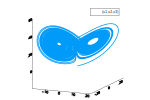

In [36]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;0.0;0.0] ; tspan = (0.0,100.0);
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)
Plots.plot(sol,vars=(1,2,3))

### Add a bit of interaction

<center><img src="https://imgs.xkcd.com/comics/mac_pc.png"/></center>

In [37]:
#Pkg.add("IJulia") 
#Pkg.add("Interact") 
#Pkg.add("Plots") 

using Interact #load library
using Plots
using IJulia

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1192


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/22e44be54a4cfcbf0b15a39fb64a147611b3d015-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/22e44be54a4cfcbf0b15a39fb64a147611b3d015-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [38]:
x = y = 0:0.1:30

freqs = OrderedDict(zip(["pi/4", "π/2", "3π/4", "π"], [π/4, π/2, 3π/4, π]))

mp = @manipulate for freq1 in freqs, freq2 in slider(0.01:0.1:4π; label="freq2")
    y = @. sin(freq1*x) * sin(freq2*x)
    plot(x, y)
end

display(mp) # do not work online on mybinder for now.


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:freq1=>Widget{:togglebuttons,Any}(OrderedDict{Symbol,Any}(:options=>Observable{OrderedDict{String,Float64}} with 2 listeners. Value:
OrderedDict("pi/4"=>0.785398,"π/2"=>1.5708,"3π/4"=>2.35619,"π"=>3.14159),:index=>Observable{Any} with 2 listeners. Value:
1,:vals2idxs=>Observable{Any} with 1 listeners. Value:
[0.785398, 1.5708, 2.35619, 3.14159]), Observable{Any} with 2 listeners. Value:
0.785398, Scope("knockout-component-1f4671df-a073-49fd-bcbe-8ddb397770d1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["freq1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :button), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")), 0)], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function () {\$root.index(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'button is-fullwidth' : true}")), 1)], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"field is-grouped has-addons is-oneline is-centered"), 2)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 3), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 9), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"pi/4","val"=>1,"id"=>"idBr3GCOTe"), OrderedDict{String,Any}("key"=>"π/2","val"=>2,"id"=>"idDsau5BEg"), OrderedDict{String,Any}("key"=>"3π/4","val"=>3,"id"=>"idmb1zi3yv"), OrderedDict{String,Any}("key"=>"π","val"=>4,"id"=>"idzm5MqY7V")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/raphaelb/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/raphaelb/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/raphaelb/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/raphaelb/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/raphaelb/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"options_js\\\":[{\\\"key\\\":\\\"pi/4\\\",\\\"val\\\":1,\\\"id\\\":\\\"idBr3GCOTe\\\"},{\\\"key\\\":\\\"π/2\\\",\\\"val\\\":2,\\\"id\\\":\\\"idDsau5BEg\\\"},{\\\"key\\\":\\\"3π/4\\\",\\\"val\\\":3,\\\"id\\\":\\\"idmb1zi3yv\\\"},{\\\"key\\\":\\\"π\\\",\\\"val\\\":4,\\\"id\\\":\\\"idzm5MqY7V\\\"}],\\\"index\\\":1}\");\n    var self = this;\n  

## Automatic differentiation



In [50]:
#Pkg.add("ForwardDiff")
using ForwardDiff

f(x::Vector) = sum(sin, x) + prod(tan, x) * sum(sqrt, x);

x = rand(5) # small size for example's sake

g = x -> ForwardDiff.gradient(f, x); # g = ∇f

@show g(x)

@show ForwardDiff.hessian(f, x)

g(x) = [23.1928, 21.2858, 22.509, 22.0068, 21.1942]
ForwardDiff.hessian(f, x) = [31.4369 48.0747 51.1381 49.8991 47.8324; 48.0747 51.16 47.2696 46.1251 44.2164; 51.1381 47.2696 67.3522 49.0608 47.0319; 49.8991 46.1251 49.0608 61.3345 45.893; 47.8324 44.2164 47.0319 45.893 49.4467]


5×5 Array{Float64,2}:
 31.4369  48.0747  51.1381  49.8991  47.8324
 48.0747  51.16    47.2696  46.1251  44.2164
 51.1381  47.2696  67.3522  49.0608  47.0319
 49.8991  46.1251  49.0608  61.3345  45.893 
 47.8324  44.2164  47.0319  45.893   49.4467

# Interop

Interop possible avec Python, Matlab, R, Java, C/Fortran,...

In [51]:
#Pkg.add("PyCall") # add python binding package

using PyCall 
@pyimport math
math.sin(math.pi / 4) - sin(pi / 4) # python - julia = 0

0.0

### Macros: code that transforms code

In [41]:
# @time macro inserts timing and memory profiling into expression, then evaluates, and prints
@time f(2//3)

  0.085254 seconds (138.90 k allocations: 7.234 MiB)


8//9

In [42]:
# @which macro determines which function is called, provides link to source code on GitHub
@which exp(π)

exp(x::Real) in Base.Math at special/exp.jl:73

In [43]:
@which exp(π*im)

exp(z::Complex) in Base at complex.jl:569

Macros enable run-time code generation and transformation. 

Applications :

  * generation and execution of boilerplate code
  * run-time generation and optimization of algorithms, e.g. FFTW, ATLAS
  * symbolic mathematics, automatic differentiation
  * *all written like high-level Python, running like compiled C !!!*

## Parallelism in Julia: just change the array type

Some very trivial examples of Julia's built-in parallelism

In [44]:
using Distributed
#Pkg.add("DistributedArrays")

addprocs(2);

In [45]:
; cat codes/count_heads.jl

function count_heads(n)
    c::Int = 0
    for i=1:n
        c += rand(Bool)
    end
    c
end


In [46]:
@everywhere include("codes/count_heads.jl")

a = @spawn count_heads(10000000)
b = @spawn count_heads(10000000)
fetch(a)+fetch(b)

10000050

### Parallel loops with reduction

In [47]:
nheads = @distributed (+) for i=1:200000000
  Int(rand(Bool))
end

99989621

And more :
- Distributed arrays
- GPUArrays
- TPUArrays ...

Just changing the behavior of the underlying structure can bring new hardware support for all packages

# Helpful materials

- Main site https://julialang.org/
- Docs https://docs.julialang.org/en/v1/
- Forum https://discourse.julialang.org/
- Book https://benlauwens.github.io/ThinkJulia.jl/latest/book.html
- Blog http://www.stochasticlifestyle.com/
- All-in-one package : https://juliacomputing.com/products/juliapro.html
- Try online  : https://juliabox.com/

<center> <img src="https://imgs.xkcd.com/comics/wisdom_of_the_ancients.png"></center>

# Code as a first-class citizen product of research

- The (new version) Julia package manager has reproductibility at its core (each code project is linked to a deterministic set of dependencies)
- Creating a Julia package comes with tools for documentation, unit testing, continuous integration
- New scientific collaborations can be based on software (see the Github organizations such as JuliaDiff, JuliaStats, etc...)



# Food for thoughts

- Cost and open source
    - Matlab licences cost several 10K€ each year to some labs
    - Julia (and Python and R) come for free but development is not free
    - A part of Matlab costs could go to financing open source software that is critical for science (see e.g. https://bitbucket.org/paugier/etude-asso-pynumfr/src/default/etude_asso_python_sciences_fr.rst?fileviewer=file-view-default)
- The combo C(++) low-level libraries and high level bindings (as Tensorflow, Keras...) lead to black box workflows...

# Conclusions

Julia
* **Easy as Matlab, fast as Fortran, flexible as Python, deep as Lisp**
*  Scientific computing, from interactive exploration to HPC
*  Paradigms (multiple dispatch) that enforce collaboration

Not covered
* large-scale programming, development ecosystem, environments, debuggers, etc.
* Abstract Types, compositions, ...
* rough edges: plotting, static compilation  (not quite there), package loading times, young 1.0

*Thanks* : the Julia community for most of the examples, xkcd

  
Julia website: http://www.julialang.org, this talk: https://github.com/raphbacher/julia-intro
